<a href="https://colab.research.google.com/github/ZerefTribbiani/Exploratory-Data-Analysis/blob/main/eda_theory_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the necessary libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Module 1: Introduction to Exploratory Data Analysis

Load and view the dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Breast Cancer Dataset.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

Structure of the dataset

In [4]:
print(f'Shape of the dataset: {df.shape}')
print('\nDataset information:')
print(df.info())

Shape of the dataset: (569, 33)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               5

Summary statistics about the dataset

In [5]:
print('Summary statistics of the numerical columns:')
df.describe()

Summary statistics of the numerical columns:


id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

Details about missing values

In [6]:
print(f'Total number of missing values: {df.isna().sum().sum()}')
print(f'Missing values per column:\n{df.isna().sum()}')

Total number of missing values: 569
Missing values per column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetr

# Module 2: Data Transformation

Remove the unnecessary columns

In [7]:
df = df.drop(columns=['id', 'Unnamed: 32'])
print(f'Remaining number of missing values: {df.isna().sum().sum()}')

Remaining number of missing values: 0


Label Encode the target variable

In [8]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Check for outliers

In [9]:
def detect_outliers(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

numerical_cols = df.select_dtypes(include=np.number).columns[1:] # Remove diagnosis column
outliers = df[numerical_cols].apply(detect_outliers)

outlier_counts = outliers.sum()
print('Number of outliers per column (Z-Score method):')
print(outlier_counts)

Number of outliers per column (Z-Score method):
radius_mean                 5
texture_mean                4
perimeter_mean              7
area_mean                   8
smoothness_mean             5
compactness_mean            9
concavity_mean              9
concave points_mean         6
symmetry_mean               5
fractal_dimension_mean      7
radius_se                   7
texture_se                  9
perimeter_se                8
area_se                     6
smoothness_se               7
compactness_se             12
concavity_se                6
concave points_se           6
symmetry_se                11
fractal_dimension_se       10
radius_worst                6
texture_worst               4
perimeter_worst             6
area_worst                 10
smoothness_worst            3
compactness_worst          10
concavity_worst             7
concave points_worst        0
symmetry_worst              9
fractal_dimension_worst     9
dtype: int64


Plot boxplots for each column

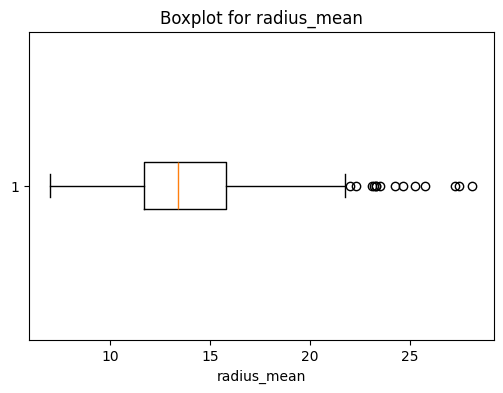

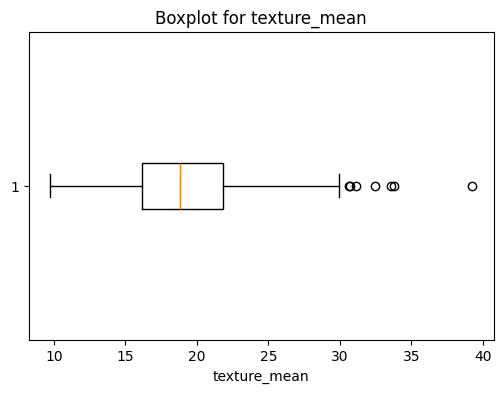

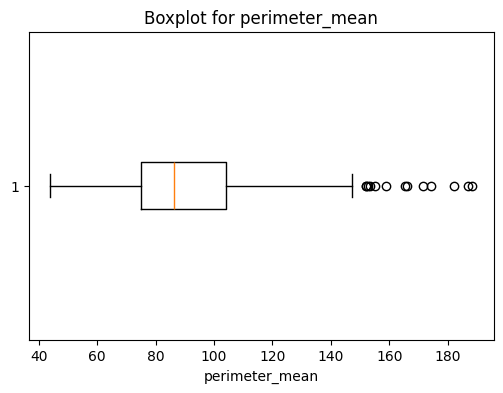

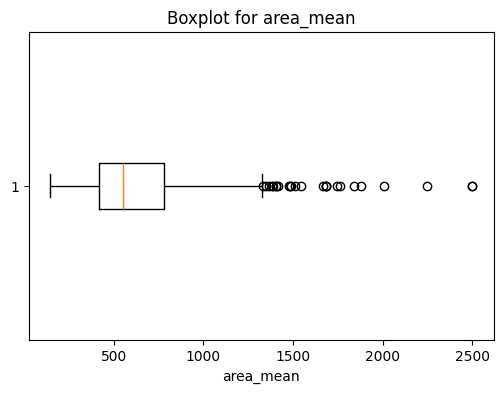

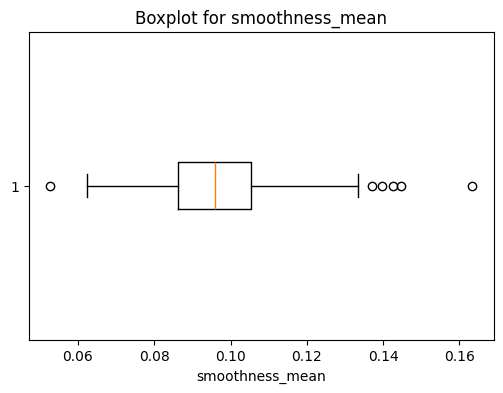

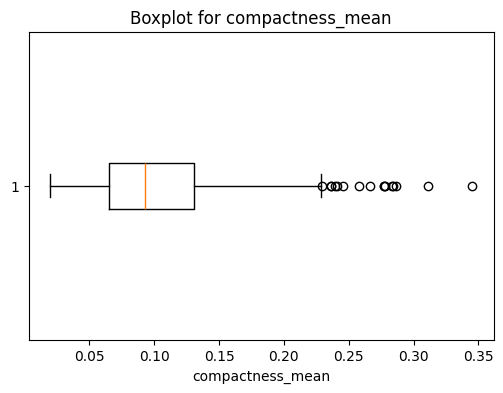

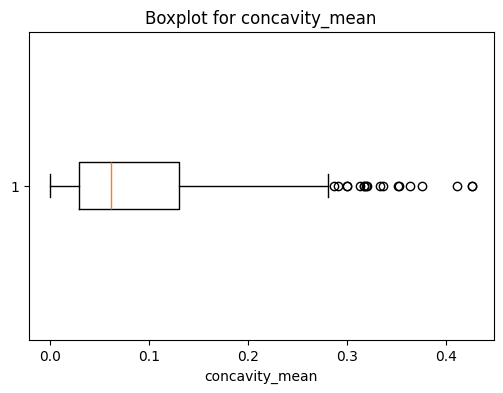

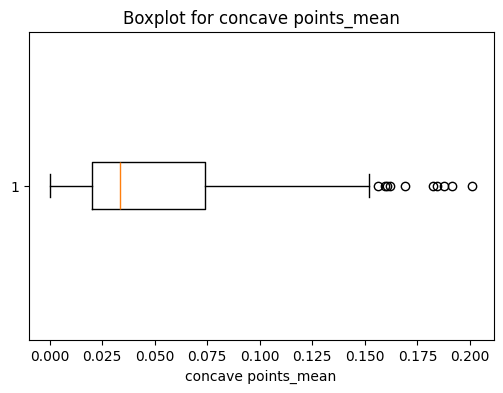

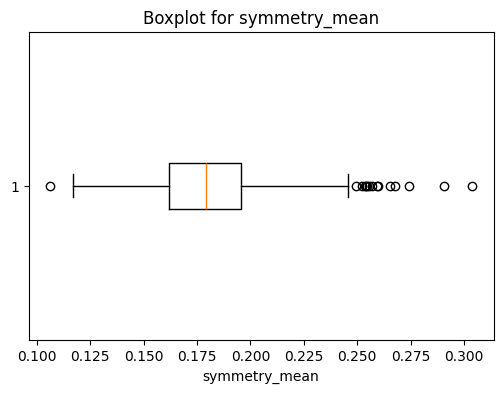

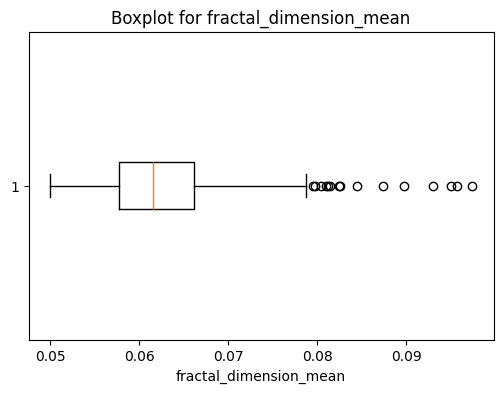

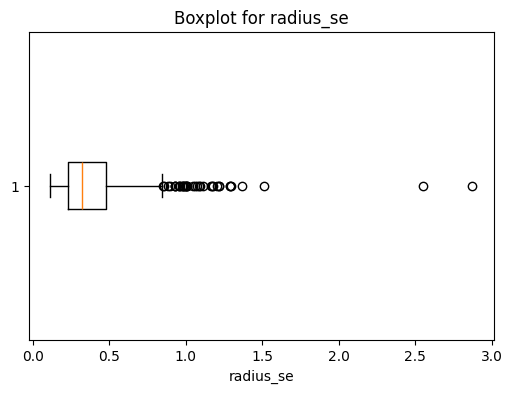

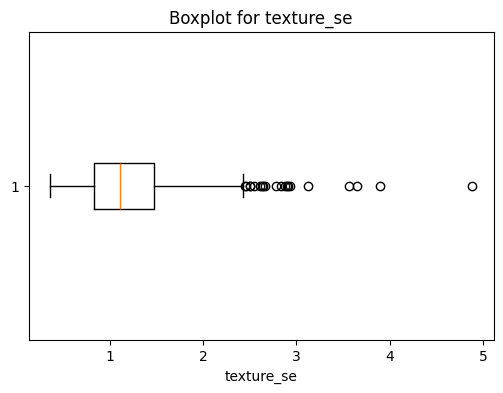

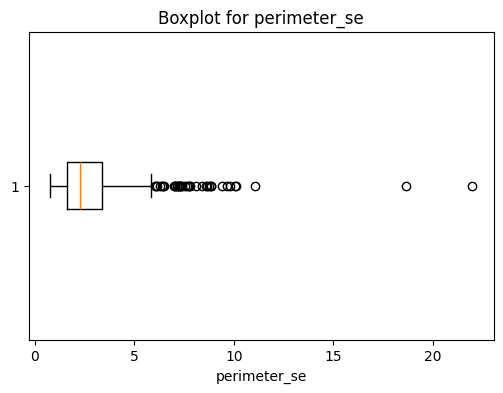

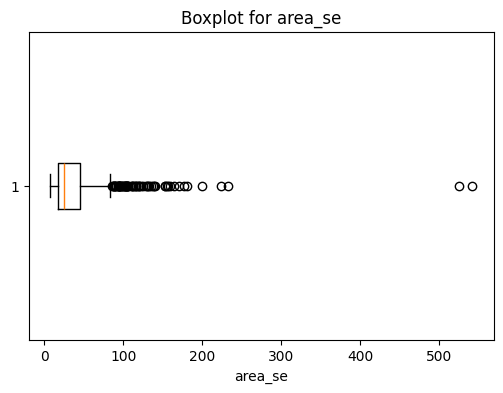

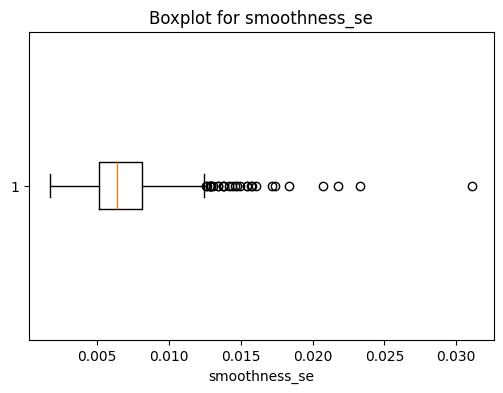

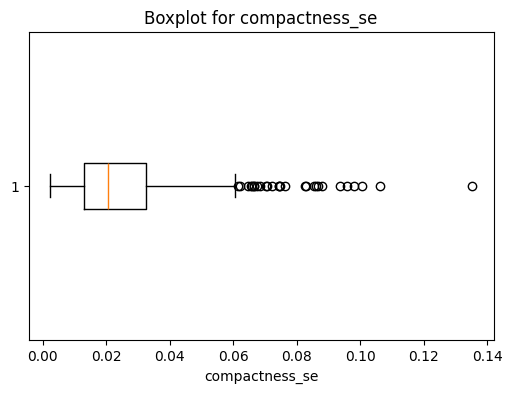

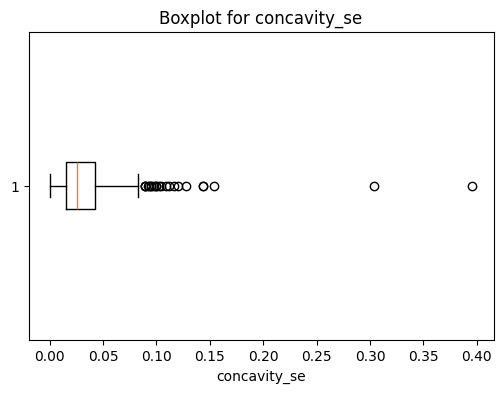

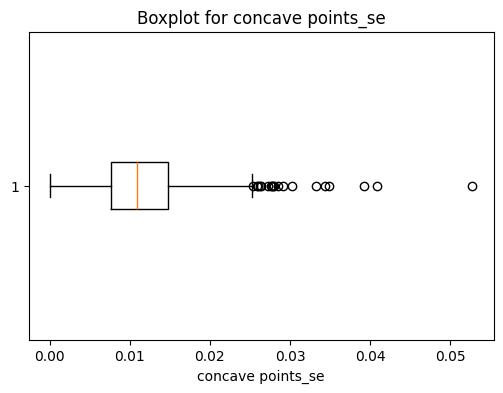

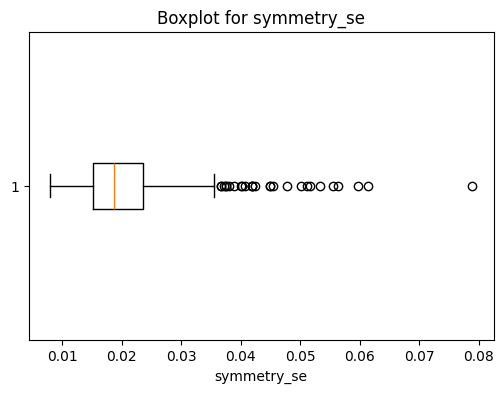

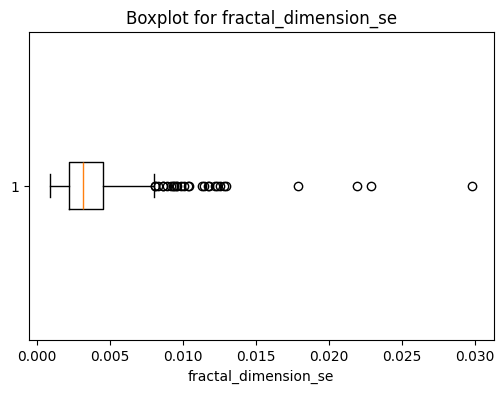

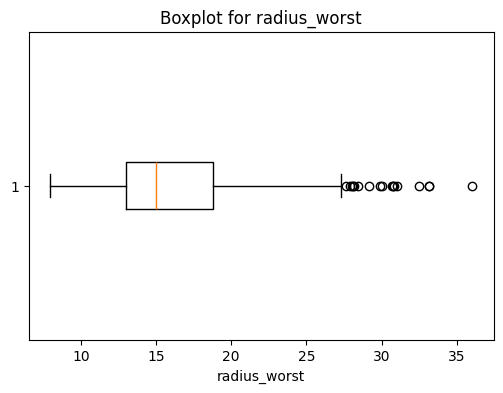

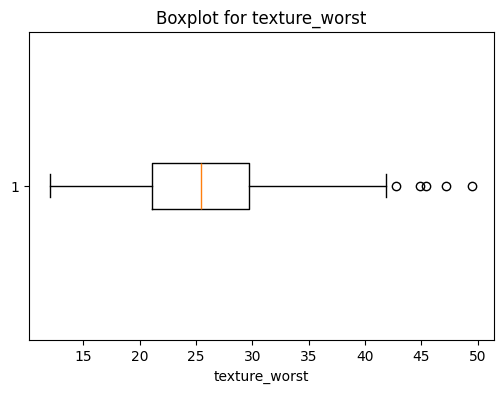

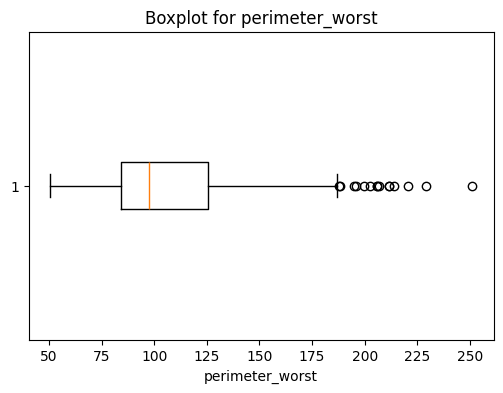

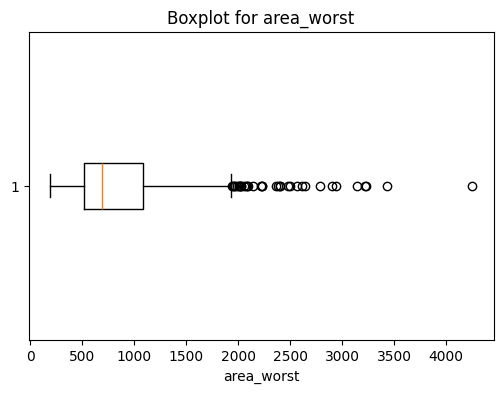

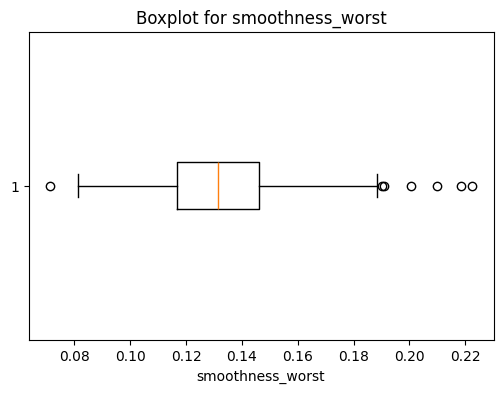

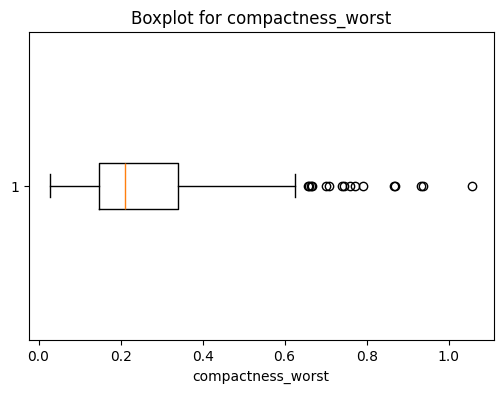

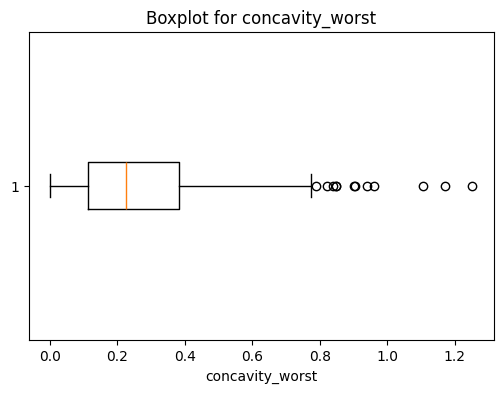

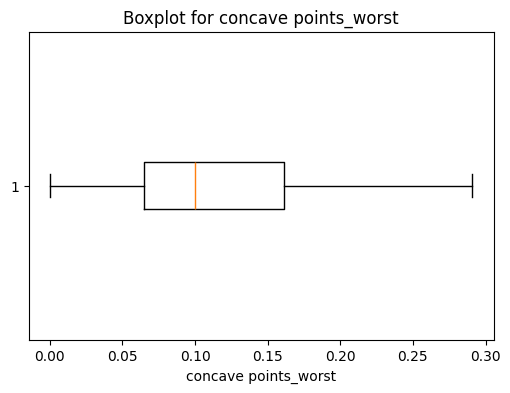

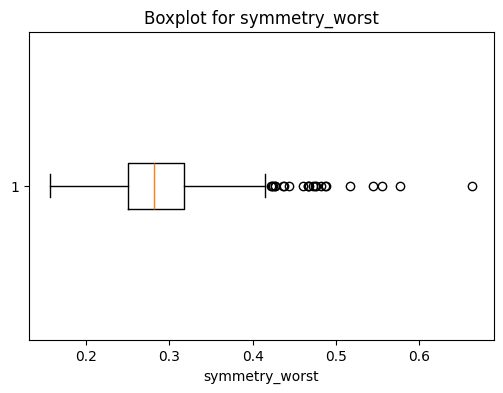

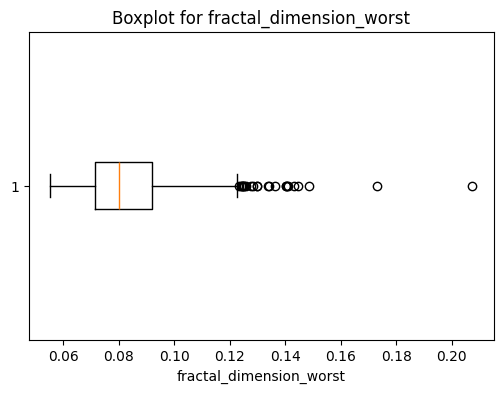

In [10]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

As this is a medical dataset, the decision to leave the outliers as is was taken

# Module 3: Correlation Analysis and Time Series Analysis

Univariate Analysis: Count Plot for the categorical variable

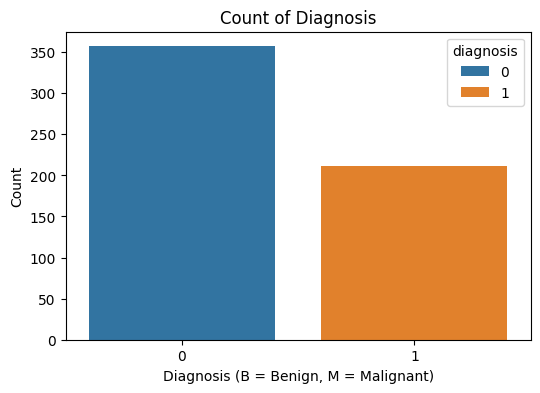

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diagnosis', hue='diagnosis')
plt.title('Count of Diagnosis')
plt.xlabel('Diagnosis (B = Benign, M = Malignant)')
plt.ylabel('Count')
plt.show()

Bivariate Analysis: Scatterplot of Concavity and Concave Points

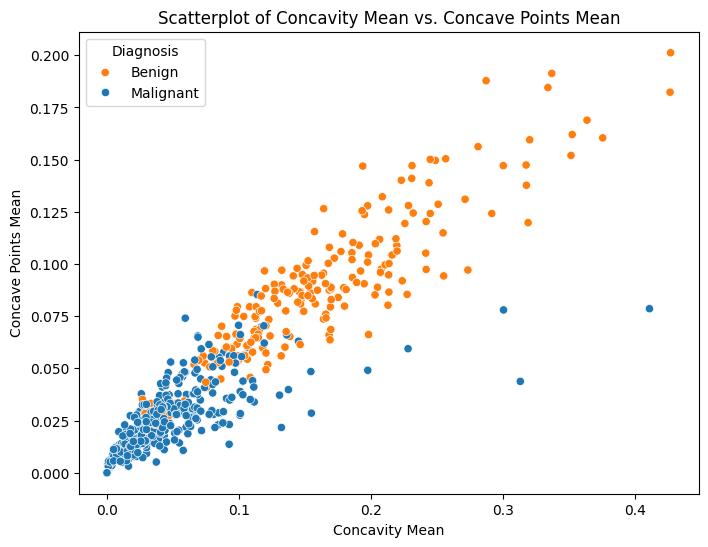

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='concavity_mean',
    y='concave points_mean',
    hue='diagnosis'
)
plt.title('Scatterplot of Concavity Mean vs. Concave Points Mean')
plt.xlabel('Concavity Mean')
plt.ylabel('Concave Points Mean')
plt.legend(title='Diagnosis', labels=['Benign', 'Malignant'])
plt.show()

Multivariate Analysis: Pairplot

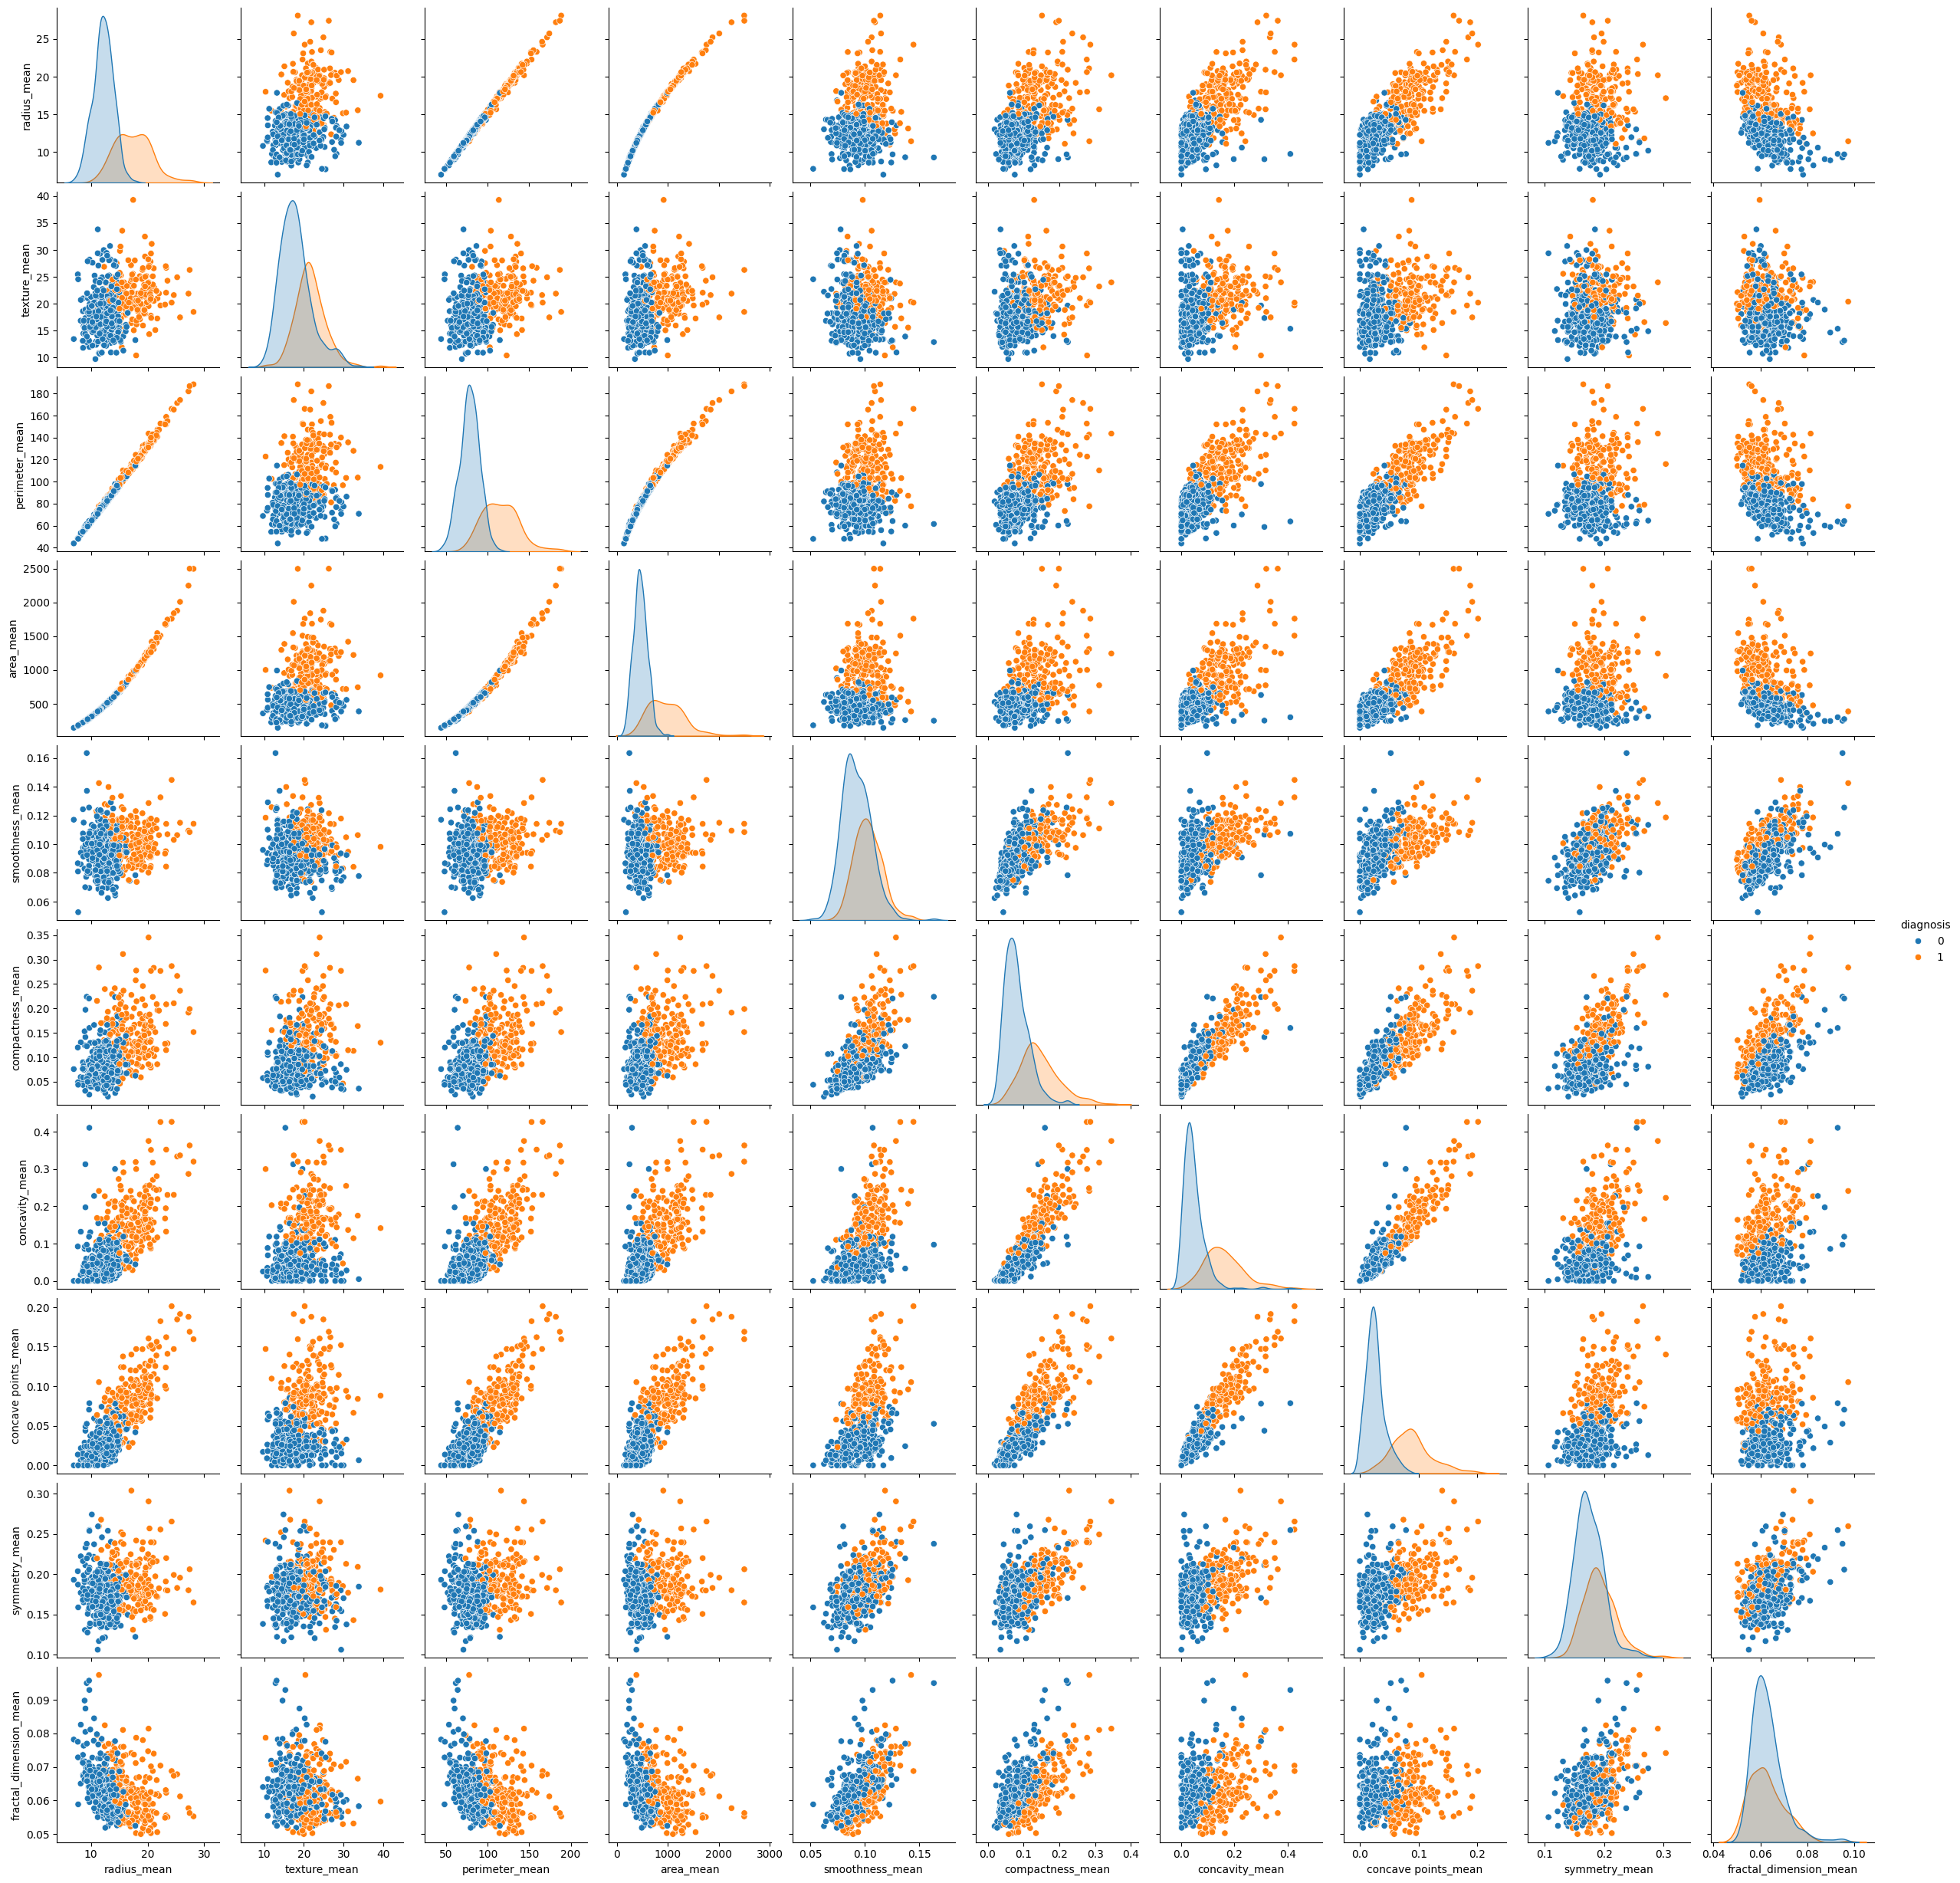

In [13]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean',
                     'area_mean', 'smoothness_mean', 'compactness_mean',
                     'concavity_mean', 'concave points_mean', 'symmetry_mean',
                     'fractal_dimension_mean', 'diagnosis']
sns.pairplot(df[selected_features], hue='diagnosis', diag_kind='kde')
plt.show()

Multivariate Analysis: Heatmap of Correlation matrix

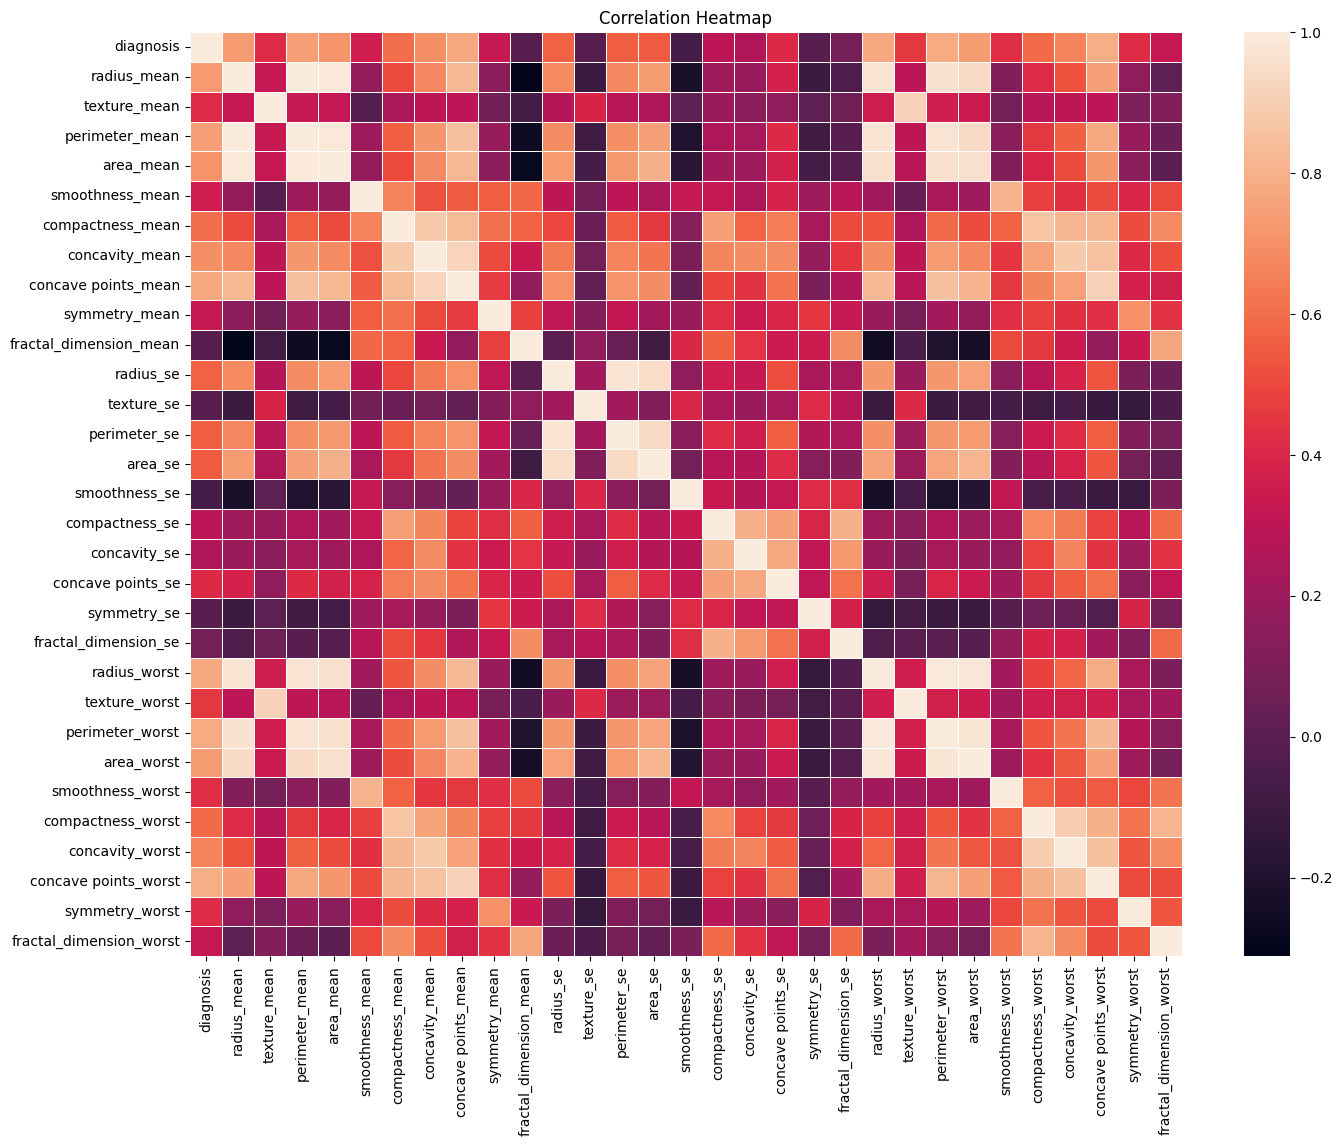

In [14]:
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Module 4: Data Summarization and Visualization

1D Statistical Analysis - Summary Statistics

In [15]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

1D Statistical Analysis - Histograms

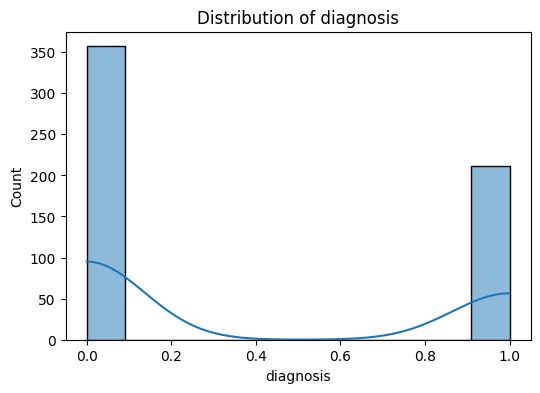

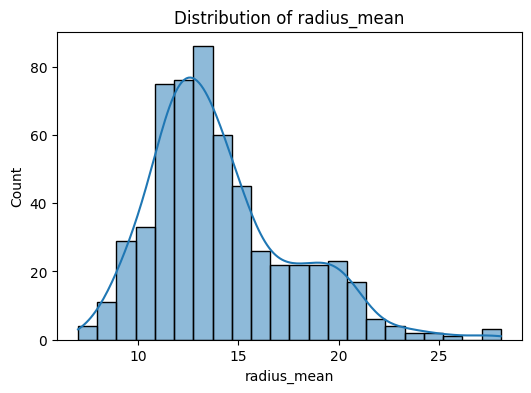

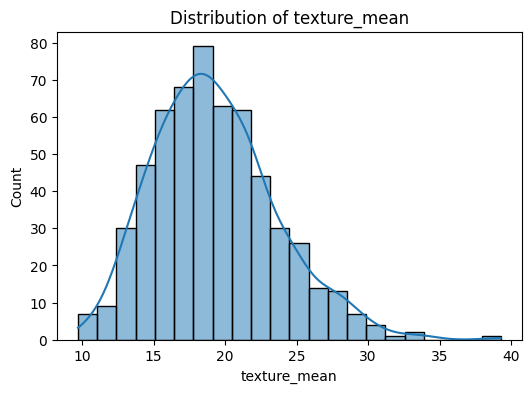

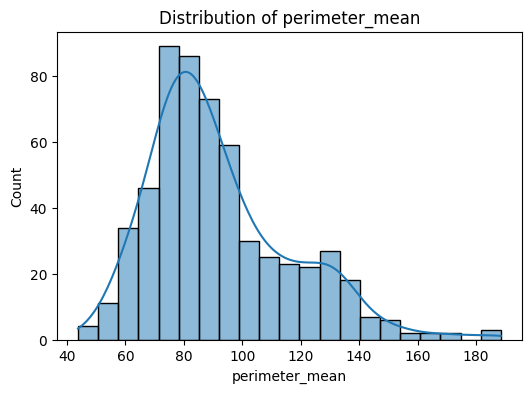

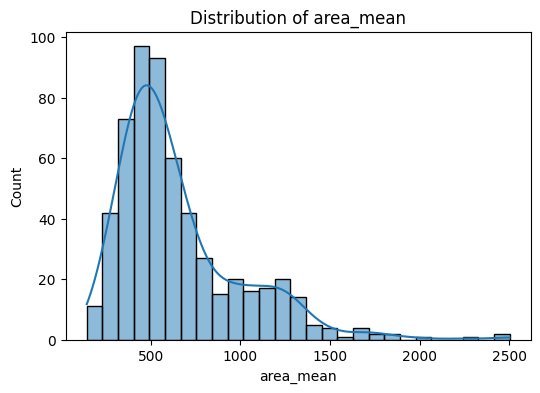

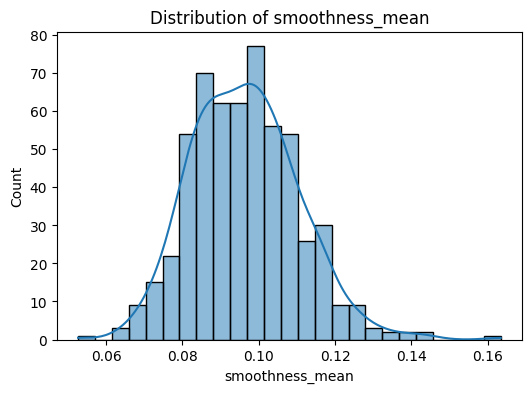

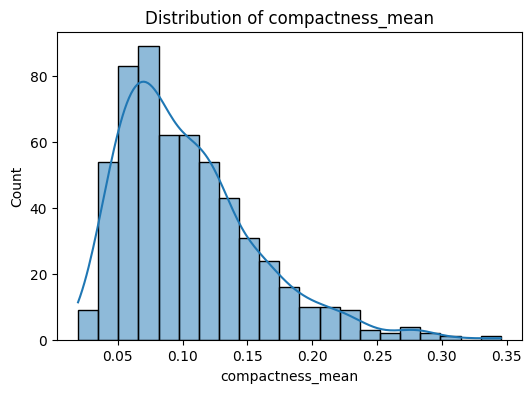

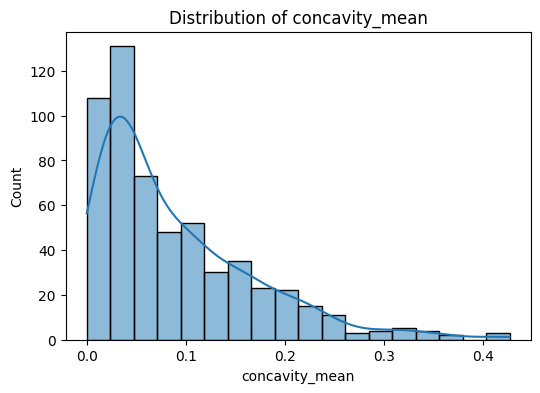

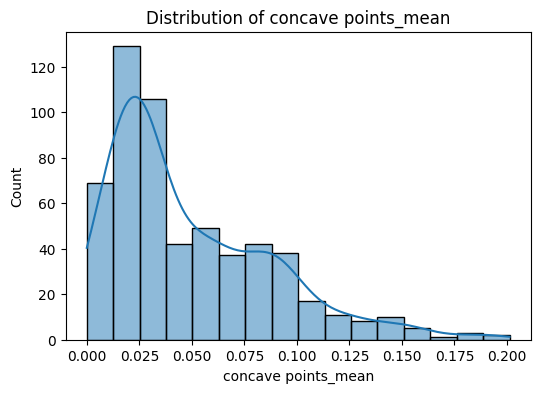

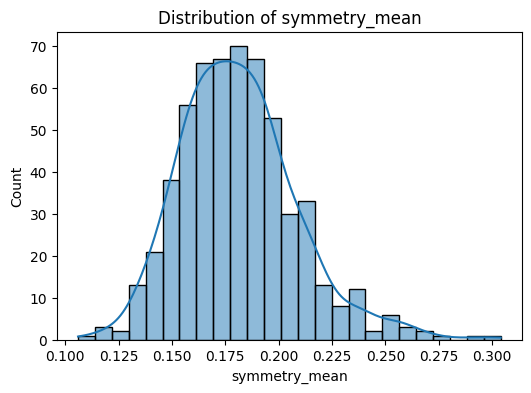

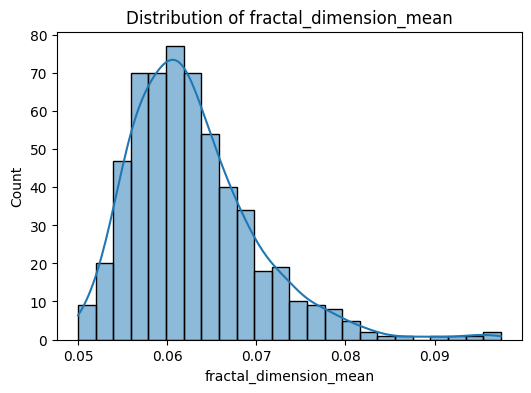

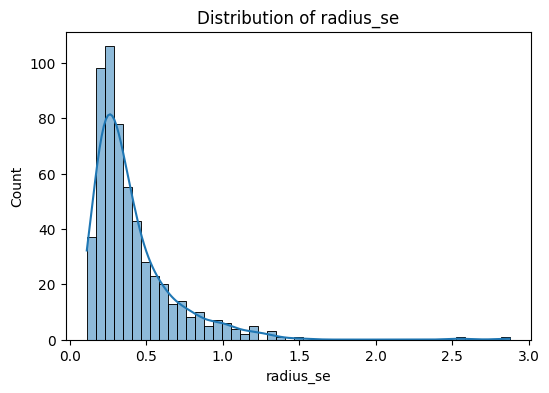

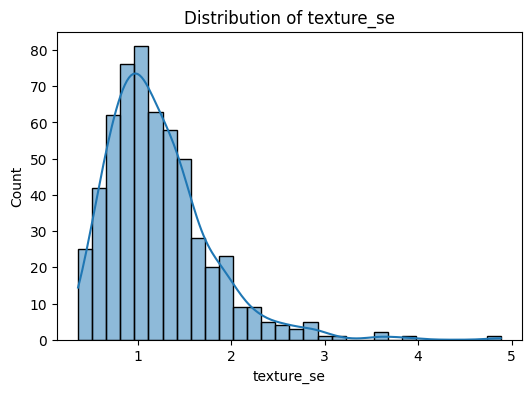

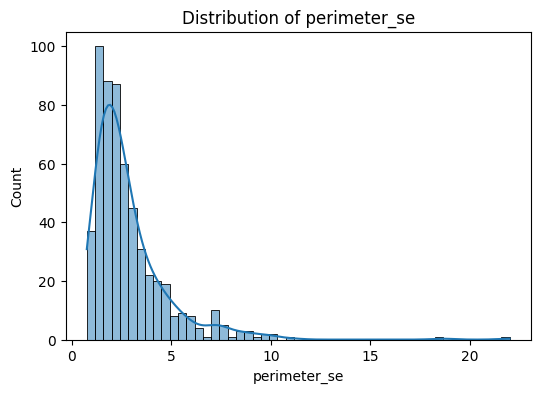

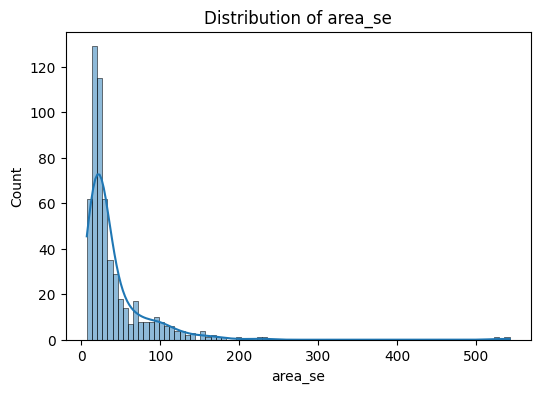

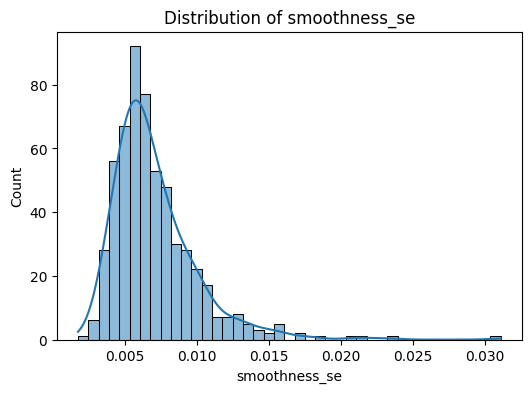

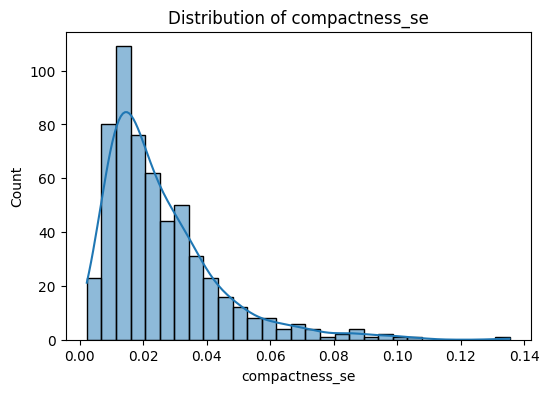

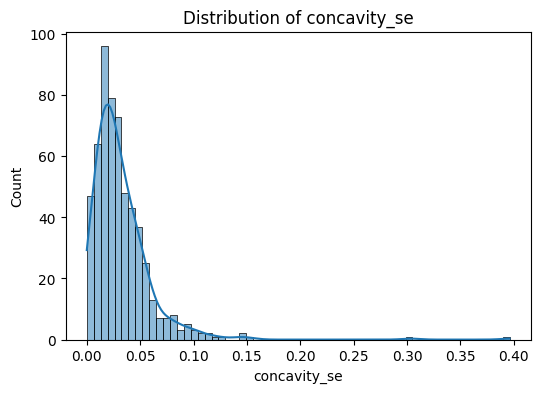

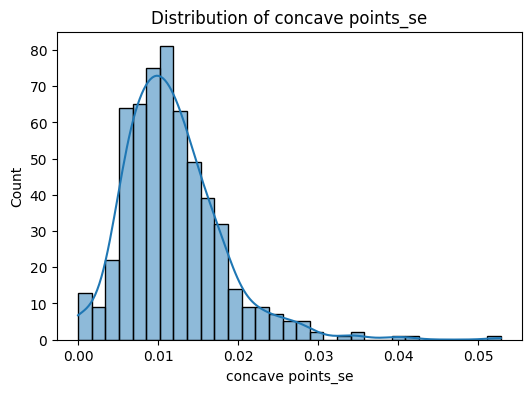

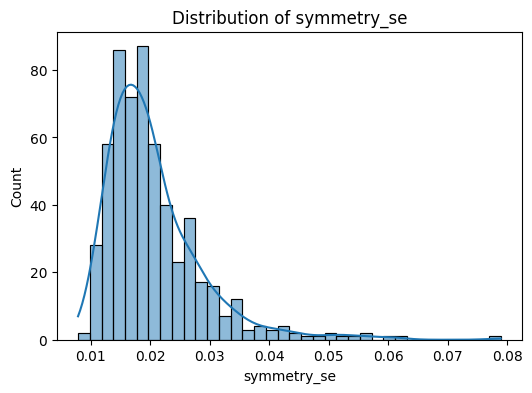

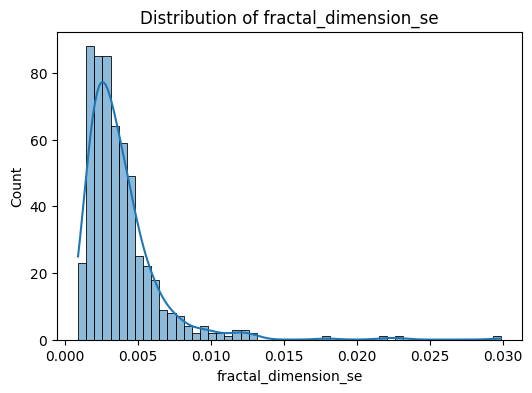

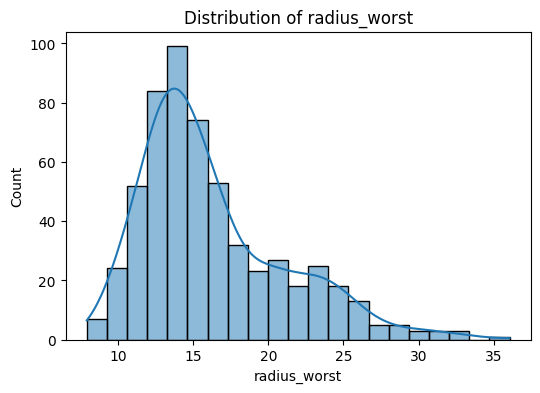

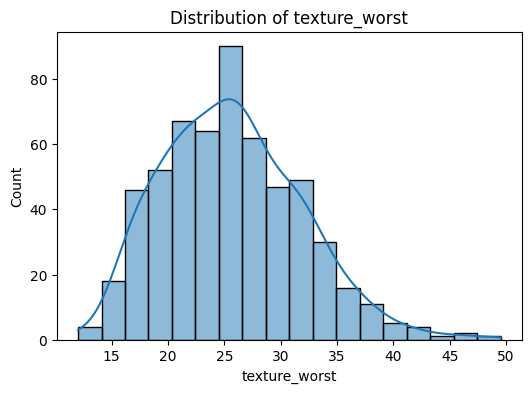

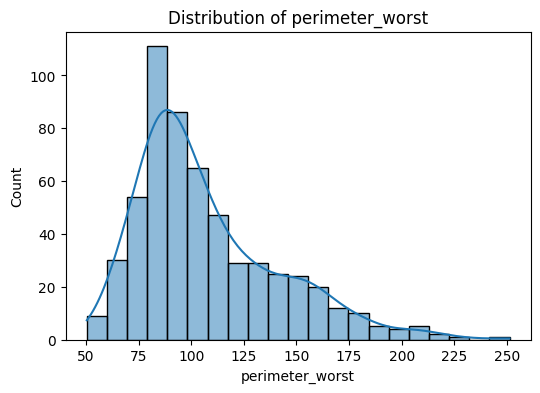

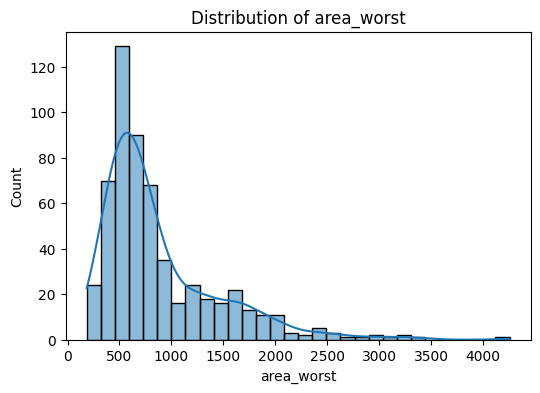

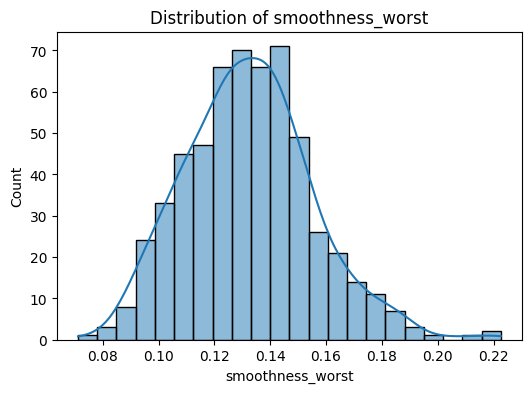

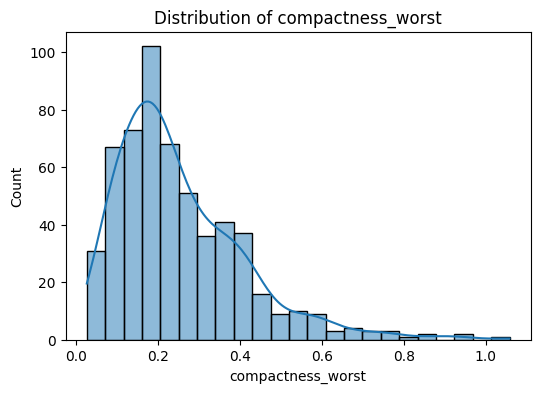

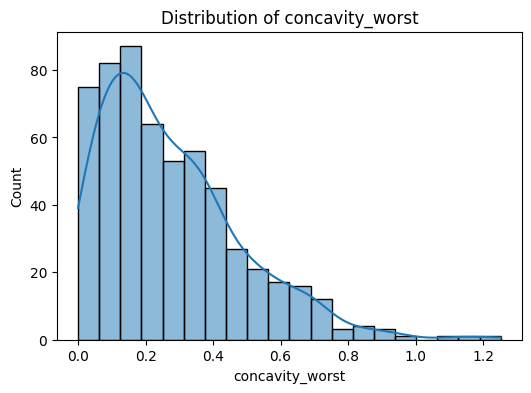

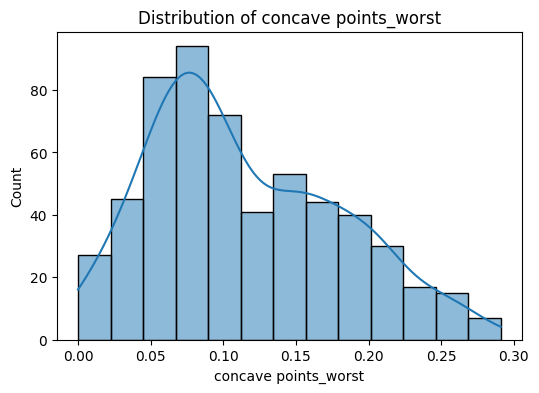

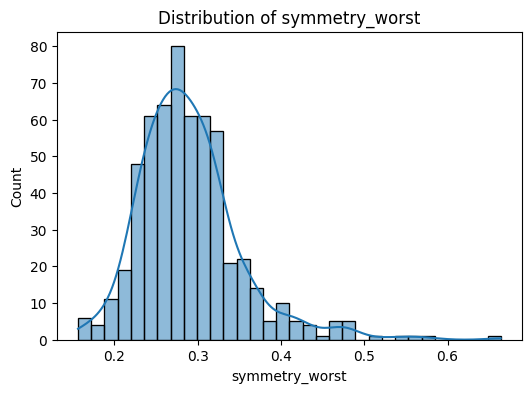

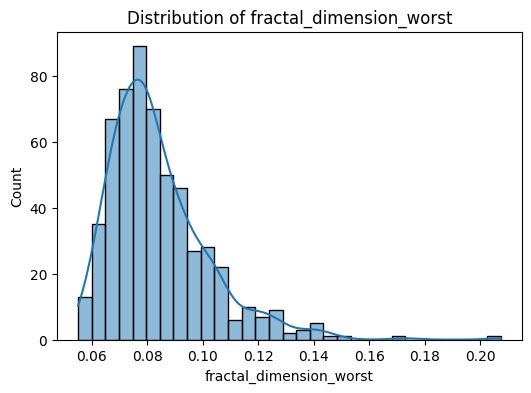

In [16]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

2D Statistical Analysis - Boxplot of Radius by Diagnosis

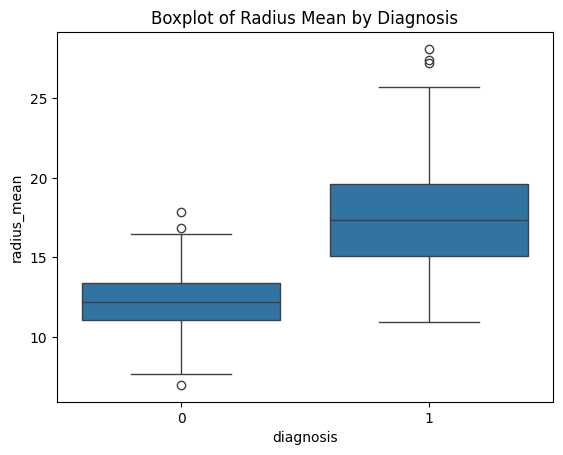

In [17]:
sns.boxplot(data=df, x='diagnosis', y='radius_mean')
plt.title('Boxplot of Radius Mean by Diagnosis')
plt.show()

# Module 5: Clustering Algorithms

Scale the data

In [18]:
x = df.drop(columns=['diagnosis'])

scaler = StandardScaler()
x = scaler.fit_transform(x)

Elbow Method using a Scree Plot

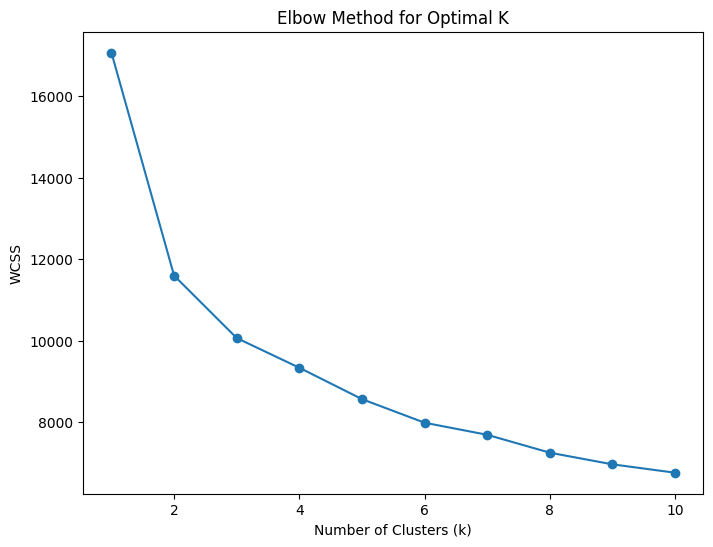

In [19]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

Perform the K-Means Algorithm

In [20]:
k = 2
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(x)

df['cluster'] = clusters

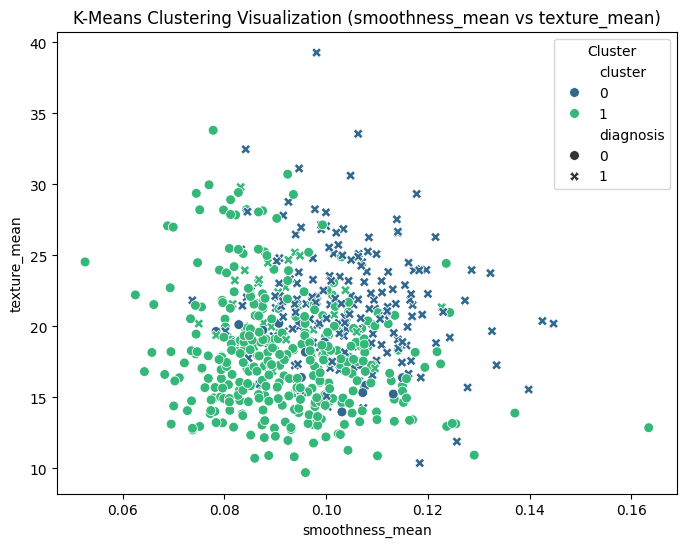

In [21]:
x_col = 'smoothness_mean'
y_col = 'texture_mean'

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x=x_col,
    y=y_col,
    hue='cluster',
    palette='viridis',
    style='diagnosis',
    s=50
)
plt.title(f'K-Means Clustering Visualization ({x_col} vs {y_col})')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend(title='Cluster', loc='best')
plt.show()

Plotting Dendrogram using Hierarchical Clustering

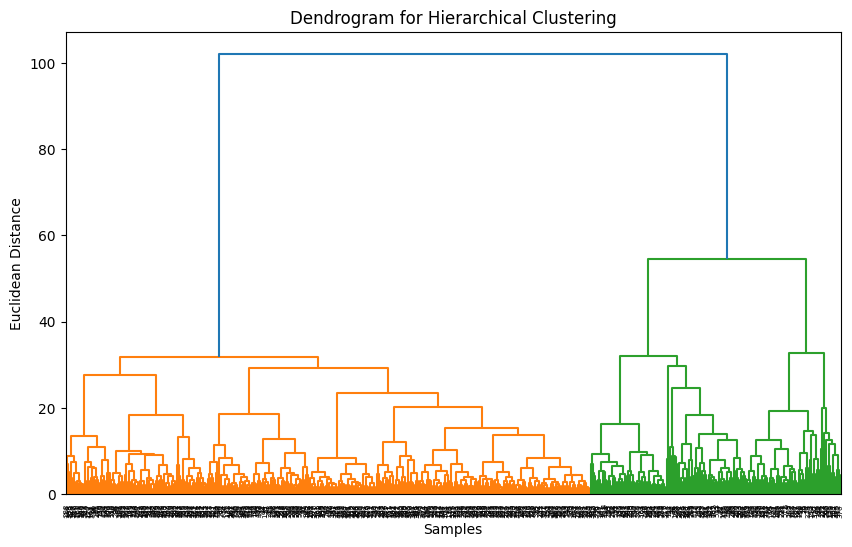

In [22]:
linked = linkage(x, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', show_leaf_counts=False)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Module 6: Dimensionality Reduction

Apply PCA on the data

In [23]:
pca = PCA()
pca_result = pca.fit_transform(x)

Plot the Explained Variance Ratio

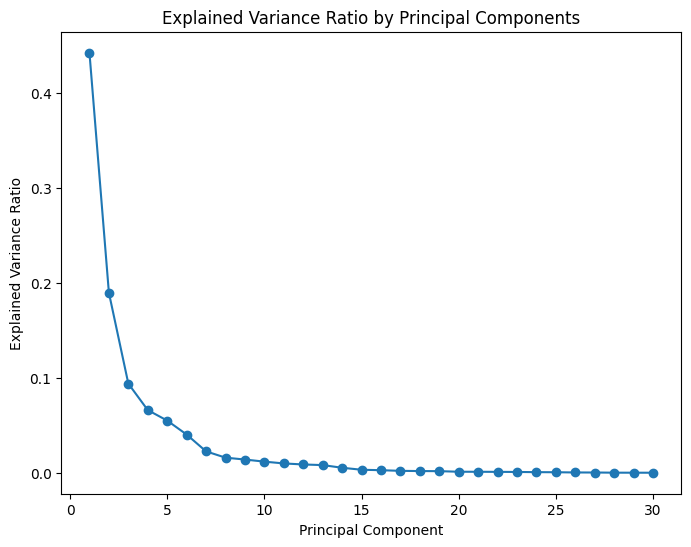

In [24]:
explained_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

Find the Optimal number of PCs

In [25]:
cumulative_var = pca.explained_variance_ratio_.cumsum()
n_pc = (cumulative_var < 0.95).sum() + 1
print(f'Optimal number of PCs to retain 95% variance: {n_pc}')

Optimal number of PCs to retain 95% variance: 10


Apply PCA again using the optimal number of PCs

In [26]:
pca = PCA(n_components=n_pc)
pca_transformed = pca.fit_transform(x)

Create a dataframe with the PCs

In [28]:
pca_df = pd.DataFrame(data=pca_transformed, columns=[f'PC{i+1}' for i in range(n_pc)])
pca_df['diagnosis'] = df['diagnosis'].values
pca_df.head()

PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0  9.192837   1.948583 -1.123166 -3.633731  1.195110  1.411424  2.159370   
1  2.387802  -3.768172 -0.529293 -1.118264 -0.621775  0.028656  0.013358   
2  5.733896  -1.075174 -0.551748 -0.912083  0.177086  0.541452 -0.668166   
3  7.122953  10.275589 -3.232790 -0.152547  2.960878  3.053422  1.429911   
4  3.935302  -1.948072  1.389767 -2.940639 -0.546747 -1.226495 -0.936213   

        PC8       PC9      PC10  diagnosis  
0 -0.398407 -0.157118 -0.877402          1  
1  0.240988 -0.711905  1.106995          1  
2  0.097374  0.024066  0.454275          1  
3  1.059565 -1.405440 -1.116975          1  
4  0.636376 -0.263805  0.377704          1

# Model 7: Model Development and Evaluation

Split the data into training and test sets

In [29]:
X = pca_df.drop(columns=['diagnosis'])
y = pca_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression

Train the Logistic Regression Model


In [30]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

Make predictions using the model

In [31]:
y_pred = lr_model.predict(X_test)

Evaluate the model

In [32]:
print('Logistic Regression:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Logistic Regression:
Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        66
           1       0.98      0.92      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Random Forest

Train the Random Forest Model

In [33]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

Make predictions using the model

In [34]:
y_pred = rf_model.predict(X_test)

Evaluate the Model

In [35]:
print('Random Forest:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Random Forest:
Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        66
           1       1.00      0.92      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

